# Mini Projet NLP : Classification des mails "SPAM ou HAM"

In [2]:
# importation des libraries nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # regex
import nltk

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [3]:
# Chargement du dataset
data = pd.read_csv('spam.csv', encoding="ISO-8859-1")

# Vérification des informations du dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# Suppression des colonnes inutiles et mise à jour des noms des colonnes
data.rename(columns={'v1':'label','v2':'mail'}, inplace=True)
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [5]:
# Affichage d'un aperçu du DataSet
data.head()

,label,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Vérification des redondances
data.duplicated().sum()

403

In [7]:
# Suppression des redondances
data.drop_duplicates(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5169 non-null   object
 1   mail    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


ham     4516
spam     653
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

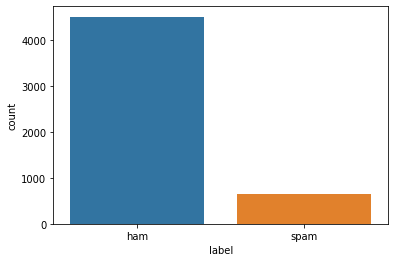

In [9]:
# Vérification de l'équilibrage des données
print(data.label.value_counts())
# Puis sous forme d'un Graphe
sns.countplot(x='label', data=data)

In [11]:
# Création de caractéristiques
data['N° de caractères'] = data.mail.apply(lambda x: len(x))
data['N° de mots'] = data.mail.apply(lambda x: len(nltk.word_tokenize(x)))
data['N° de phrases'] = data.mail.apply(lambda x: len(nltk.sent_tokenize(x)))

data.describe()

,N° de caractères,N° de mots,N° de phrases
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


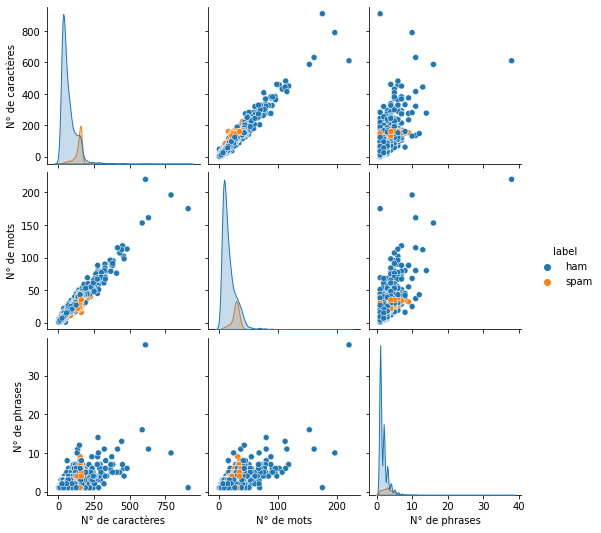

In [12]:
sns.pairplot(data, hue='label')

In [13]:
# Encodage de la colonne label
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

In [14]:
# Fonction de Nettoyage du message

def cleanText(text):
    # Conversion en miniscules
    mail = text.lower()
    # Suppression des caractères non alpha-numeriques
    mail = re.sub('[^0-9a-z]',' ',mail)
    # Division 
    mail = mail.split()
    # Jointure des mots avec des espaces
    mail = ' '.join(mail)
    return mail


data['cleanMail'] = data['mail'].apply(cleanText)

In [17]:
# Suppression des colonnes inutiles
data = data.drop(['mail','N° de caractères','N° de mots','N° de phrases'], axis=1)

In [18]:
# Copie du DataSet pour CountVectorizer
cvdf = data.copy()
# Copie du DataSet pour le traitement étape par étape
df = data.copy()

In [20]:
# Separation des caractéristiques
X = cvdf['cleanMail']
y = cvdf['label']

In [21]:
# Application du CountVectorizer
cv = CountVectorizer()
cvdf = cv.fit_transform(X)

In [22]:
print(cvdf.shape)
print(y.shape)

(5169, 8622)
(5169,)


In [23]:
# Division du DataSet en Train Data et Test Data
X_train, X_test, y_train, y_test = train_test_split(cvdf, y, test_size=0.3, random_state=42)

In [25]:
# Construction du modèle

mnb = MultinomialNB()
mnb.fit(X_train,y_train)

# Vérification du Cross Validation Score
cv_score = cross_val_score(mnb, X_train,y_train,scoring='accuracy',cv=10)
print(cv_score.mean())

# Métriques du modèle
pred_test = mnb.predict(X_test)
print(classification_report(y_test,pred_test))

0.9789932814006519
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1331
           1       0.94      0.93      0.93       220

    accuracy                           0.98      1551
   macro avg       0.96      0.96      0.96      1551
weighted avg       0.98      0.98      0.98      1551



In [28]:
# Vérification avec de nouvelles données de Test

message1 = "Hey, call ur mom she is worried"
message2 = "YOU ARE CHOSEN TO RECEIVE A £350 AWARD! Pls call claim to collect your award which you are selected to receive as a valued mobile customer."

In [29]:
# Pre-processing des données
m1 = cleanText(message1)
m2 = cleanText(message2)

m1 = [m1]
m2 = [m2]

In [30]:
# Prédiction (1 pour Spam)
print(mnb.predict(cv.transform(m1)))
print(mnb.predict(cv.transform(m2)))

[0]
[1]


**Les résultats retournés indiquent que le modèle classifie les message correctement.**
-
-
-
-
<center><b>SPAM Detection using SKLearn & NLTK - By : LAZHAR Abdellah MS:IDDL (T.A)<b><center>